<a href="https://colab.research.google.com/github/Isa-Rocha31415/An-lisis-de-datos-Spotify-2023/blob/main/Proyecto_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos Spotify 2023: *Most Streamed Spotify Songs 2023* 🎵📊


https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data


In [129]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests
import chardet
import nltk
from nltk.corpus import stopwords

In [130]:
!pip install chardet

In [131]:
url = 'https://raw.githubusercontent.com/Isa-Rocha31415/An-lisis-de-datos-Spotify-2023/main/spotify-2023.csv'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
df_spot = pd.read_csv(url, encoding=encoding)
df_spot.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Información por columna
* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song



## Casos de uso

## Limpieza y exploración de los datos

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
#df_spot = pd.read_csv("/content/drive/MyDrive/Ciencias de Datos/Tecnolochicas/Tecnolochicas-equipo/spotify-2023.csv", index_col=0, encoding=encoding)

In [134]:
df_spot.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [135]:
df_spot.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [136]:
df_spot.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [137]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [138]:
df_spot.shape

(953, 24)

In [139]:
df_spot.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [140]:
df_spot.duplicated().sum()

0

In [141]:
df_spot.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [142]:
#Quitar valores no numericos de columna streams
#df_spot['streams'] = pd.to_numeric(df_spot['streams'], errors='coerce')


In [143]:
#contar cuántos NaNs existen usando la agregación sum, que suma 1 por cada True y 0 por cada False
df_spot.isna().sum(axis=0)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

# Tema 2 : Introducción a la visualización de datos: Distribuciones

In [144]:
df_spot.max()

<ipython-input-144-970207959612>:1: FutureWarning:

The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



track_name                                          ýýýýýýýýýýýýýýýýýýýýý
artist(s)_name                                                       teto
artist_count                                                            8
released_year                                                        2023
released_month                                                         12
released_day                                                           31
in_spotify_playlists                                                52898
in_spotify_charts                                                     147
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                    672
in_apple_charts                                                       275
in_deezer_playlists                                                    99
in_deezer_charts                                                       58
bpm                                   

In [145]:
df_spot.min()

<ipython-input-145-0d33ba32ca0a>:1: FutureWarning:

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



track_name              'Till I Collapse
artist(s)_name                  (G)I-DLE
artist_count                           1
released_year                       1930
released_month                         1
released_day                           1
in_spotify_playlists                  31
in_spotify_charts                      0
streams                        100409613
in_apple_playlists                     0
in_apple_charts                        0
in_deezer_playlists                    0
in_deezer_charts                       0
bpm                                   65
mode                               Major
danceability_%                        23
valence_%                              4
energy_%                               9
acousticness_%                         0
instrumentalness_%                     0
liveness_%                             3
speechiness_%                          2
dtype: object

Percentiles de año, mes y dia de lanzamineto y stream
released_year
released_month
released_day
streams

Text(0.5, 1.0, 'Distribucion del año de lanzamiento')

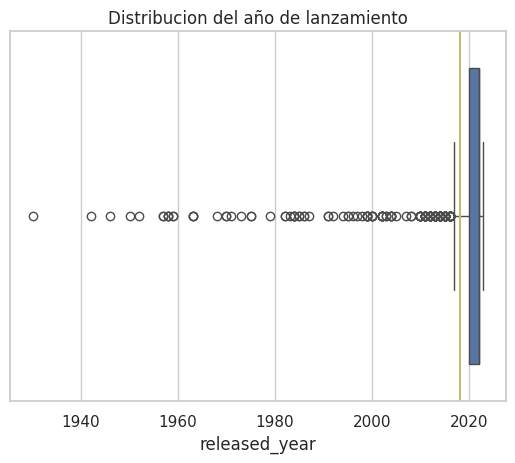

In [146]:
sns.set(style="whitegrid")
sns.boxplot(x=df_spot['released_year'])
plt.axvline(df_spot['released_year'].mean(), c='y')
plt.title("Distribucion del año de lanzamiento")

In [147]:
df_spot['released_year'].mean()


2018.2381951731375

In [148]:
df_spot['released_year'].median()

2022.0

In [149]:
df_spot['released_year'].mode()

0    2022
Name: released_year, dtype: int64



*   Media o promedio: 2018.2381951731375
*   Mediana o la mitad: 2022.0
*   Moda dato mas repetido:2022

*   Calcular IQR






Percentil 25 y 75 de cada columna:
0.25    2020.0
0.75    2022.0
Name: released_year, dtype: float64
Límite inferior de los bigotes: 2017.0
Límite superior de los bigotes: 2025.0


<Axes: xlabel='released_year'>

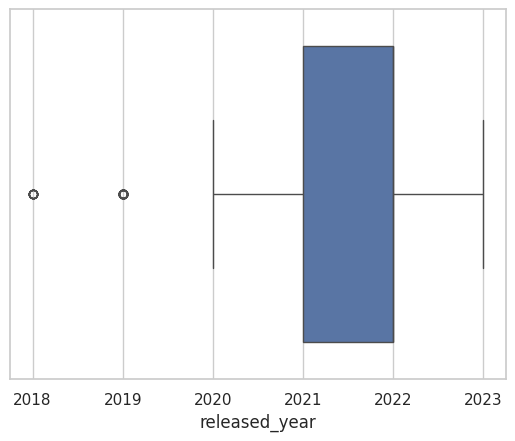

In [150]:
percentiles_25_75 = df_spot['released_year'].quantile(q=[0.25, 0.75])

print("Percentil 25 y 75 de cada columna:")
print(percentiles_25_75)
Q1 = 2020
Q3 = 2022
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5 * IQR)  # Límite inferior de los bigotes
limite_superior = Q3 + (1.5 * IQR)  # Límite superior de los bigotes

print("Límite inferior de los bigotes:", limite_inferior)
print("Límite superior de los bigotes:", limite_superior)

iqr = df_spot['released_year'].quantile(0.75) - df_spot['released_year'].quantile(0.25)
filtro_inferior = df_spot['released_year'] >  df_spot['released_year'].quantile(0.25) - (iqr * 1.5)
filtro_superior =  df_spot['released_year'] < df_spot['released_year'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_spot[filtro_inferior & filtro_superior]

sns.boxplot(df_filtrado['released_year'],orient='h')

Calcular IQR

*   IQR = Q3 -Q1
*   IQR = 2022 -2020 = 2


*   IQR =Rango Intercuartílico (IQR): 2




Text(0.5, 1.0, 'Distribucion del mes de lanzamiento')

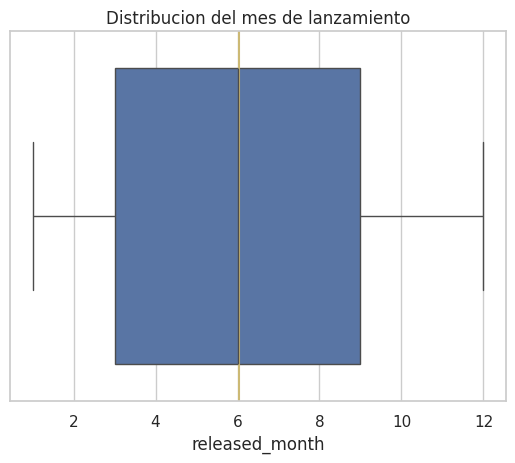

In [151]:
sns.set(style="whitegrid")
sns.boxplot(x=df_spot['released_month'])
plt.axvline(df_spot['released_month'].mean(), c='y')
plt.title("Distribucion del mes de lanzamiento")

In [152]:
df_spot['released_month'].mean()

6.033578174186778

In [153]:
df_spot['released_month'].median()

6.0

In [154]:
df_spot['released_month'].mode()

0    1
Name: released_month, dtype: int64

Percentil 25 y 75 de cada columna:
0.25    3.0
0.75    9.0
Name: released_month, dtype: float64
Límite inferior de los bigotes: -6.0
Límite superior de los bigotes: 18.0


<Axes: xlabel='released_month'>

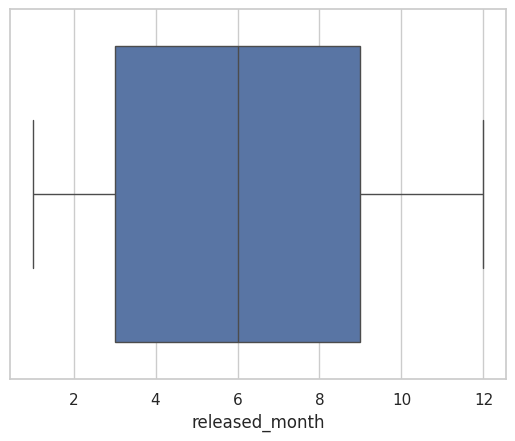

In [155]:
percentiles_25_75 = df_spot['released_month'].quantile(q=[0.25, 0.75])
print("Percentil 25 y 75 de cada columna:")
print(percentiles_25_75)
Q1 = 3.0
Q3 = 9.0
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5 * IQR)  # Límite inferior de los bigotes
limite_superior = Q3 + (1.5 * IQR)  # Límite superior de los bigotes

print("Límite inferior de los bigotes:", limite_inferior)
print("Límite superior de los bigotes:", limite_superior)

iqr = df_spot['released_month'].quantile(0.75) - df_spot['released_month'].quantile(0.25)
filtro_inferior = df_spot['released_month'] >  df_spot['released_month'].quantile(0.25) - (iqr * 1.5)
filtro_superior =  df_spot['released_month'] < df_spot['released_month'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_spot[filtro_inferior & filtro_superior]

sns.boxplot(df_filtrado['released_month'],orient='h')

IQR =Rango Intercuartílico (IQR): 6



Text(0.5, 1.0, 'Distribucion del stream de la cancion')

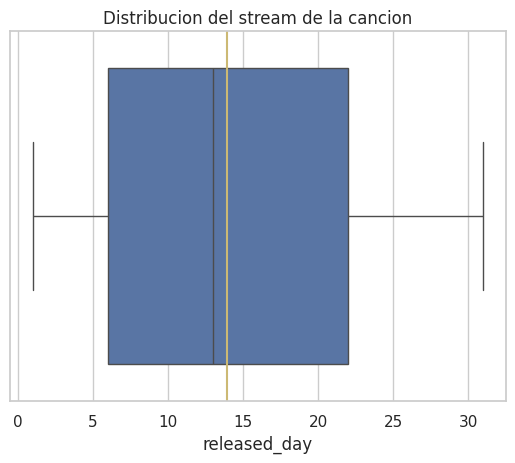

In [156]:
sns.set(style="whitegrid")
sns.boxplot(x=df_spot['released_day'])
plt.axvline(df_spot['released_day'].mean(), c='y')
plt.title("Distribucion del stream de la cancion")

In [157]:
df_spot['released_day'].mean()

13.930745015739769

In [158]:
df_spot['released_day'].median()

13.0

In [159]:
df_spot['released_day'].mode()

0    1
Name: released_day, dtype: int64

Percentil 25 y 75 de cada columna:
0.25     6.0
0.75    22.0
Name: released_day, dtype: float64
Límite inferior de los bigotes: -18.0
Límite superior de los bigotes: 46.0


<Axes: xlabel='released_day'>

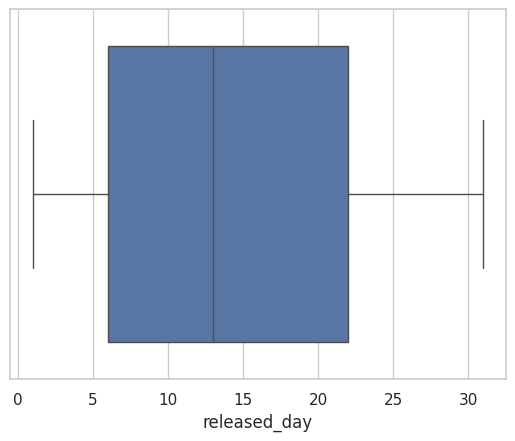

In [160]:
percentiles_25_75 = df_spot['released_day'].quantile(q=[0.25, 0.75])
print("Percentil 25 y 75 de cada columna:")
print(percentiles_25_75)
Q1 = 6.0
Q3 = 22.0
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5 * IQR)  # Límite inferior de los bigotes
limite_superior = Q3 + (1.5 * IQR)  # Límite superior de los bigotes

print("Límite inferior de los bigotes:", limite_inferior)
print("Límite superior de los bigotes:", limite_superior)

iqr = df_spot['released_day'].quantile(0.75) - df_spot['released_day'].quantile(0.25)
filtro_inferior = df_spot['released_day'] >  df_spot['released_day'].quantile(0.25) - (iqr * 1.5)
filtro_superior =  df_spot['released_day'] < df_spot['released_day'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_spot[filtro_inferior & filtro_superior]

sns.boxplot(df_filtrado['released_day'],orient='h')

IQR =Rango Intercuartílico (IQR): 16


## Tablas de frecuencias

In [161]:
df_spot.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [162]:
year = df_spot['released_year']
rango_lanzamientosaño = year.max() - year.min()
print(f'Rango de lanzamientos por año:{rango_lanzamientosaño}')

Rango de lanzamientos por año:93


In [163]:
pd.cut(year, 20)
seg = pd.cut(year, 20)
df_spot['released_year'].groupby(seg).count()

released_year
(1929.907, 1934.65]      1
(1934.65, 1939.3]        0
(1939.3, 1943.95]        1
(1943.95, 1948.6]        1
(1948.6, 1953.25]        2
(1953.25, 1957.9]        2
(1957.9, 1962.55]        5
(1962.55, 1967.2]        3
(1967.2, 1971.85]        4
(1971.85, 1976.5]        3
(1976.5, 1981.15]        1
(1981.15, 1985.8]        9
(1985.8, 1990.45]        3
(1990.45, 1995.1]        6
(1995.1, 1999.75]        8
(1999.75, 2004.4]       16
(2004.4, 2009.05]        4
(2009.05, 2013.7]       40
(2013.7, 2018.35]       75
(2018.35, 2023.0]      769
Name: released_year, dtype: int64

## Historigramas

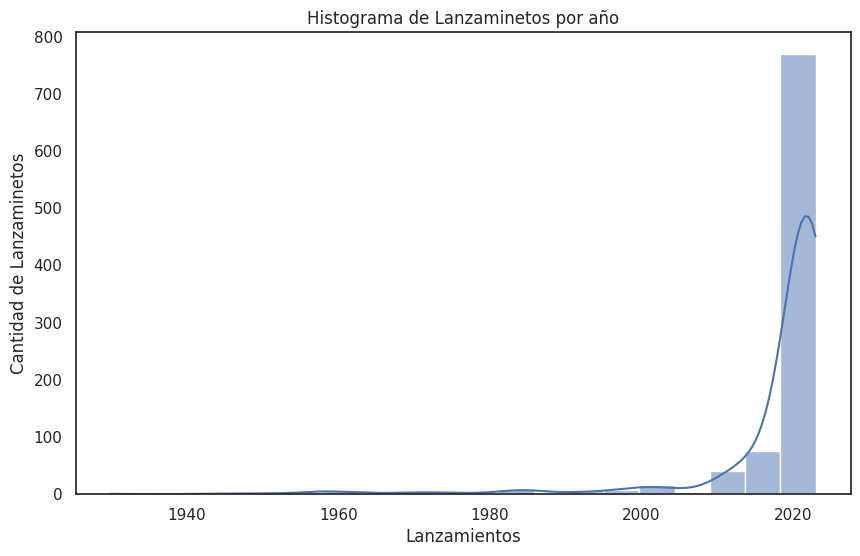

In [164]:
# Configurando el estilo de Seaborn
sns.set(style='white')

# Creando el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_spot['released_year'], kde=True, bins=20, stat='count')
# sns.histplot(df_spot['released_year'], kde=True, bins=50,stat='count')
# sns.histplot(df_spot['released_year'], kde=True, bins=20,stat='density')

# Configurando títulos y etiquetas
plt.title('Histograma de Lanzaminetos por año')
plt.xlabel('Lanzamientos')
plt.ylabel('Cantidad de Lanzaminetos')

# Mostrando el gráfico
plt.show()

### Por mes

In [165]:
month = df_spot['released_month']
rango_lanzamientosmes = month.max() - month.min()
print(f'Rango de lanzamientos por mes:{rango_lanzamientosmes}')

Rango de lanzamientos por mes:11


In [166]:
pd.cut(month, 20)
seg = pd.cut(month, 20)
df_spot['released_month'].groupby(seg).count()

released_month
(0.989, 1.55]    134
(1.55, 2.1]       61
(2.1, 2.65]        0
(2.65, 3.2]       86
(3.2, 3.75]        0
(3.75, 4.3]       66
(4.3, 4.85]        0
(4.85, 5.4]      128
(5.4, 5.95]        0
(5.95, 6.5]       86
(6.5, 7.05]       62
(7.05, 7.6]        0
(7.6, 8.15]       46
(8.15, 8.7]        0
(8.7, 9.25]       56
(9.25, 9.8]        0
(9.8, 10.35]      73
(10.35, 10.9]      0
(10.9, 11.45]     80
(11.45, 12.0]     75
Name: released_month, dtype: int64

### Historigrama

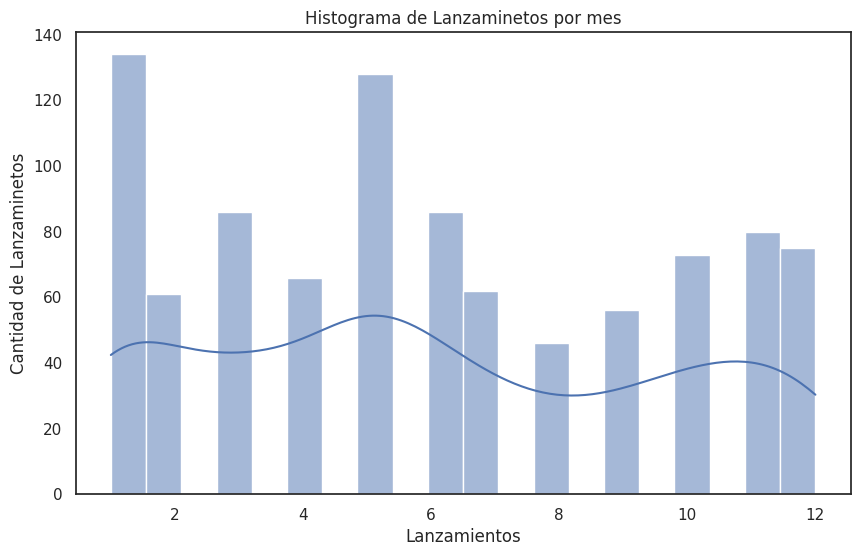

In [167]:
sns.set(style='white')

# Creando el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_spot['released_month'], kde=True, bins=20, stat='count')
# sns.histplot(df_spot['released_month'], kde=True, bins=50,stat='count')
# sns.histplot(df_spot['released_month'], kde=True, bins=20,stat='density')

# Configurando títulos y etiquetas
plt.title('Histograma de Lanzaminetos por mes')
plt.xlabel('Lanzamientos')
plt.ylabel('Cantidad de Lanzaminetos')

# Mostrando el gráfico
plt.show()

### Por dia

In [168]:
day = df_spot['released_month']
rango_lanzamientosdia = day.max() - day.min()
print(f'Rango de lanzamientos por dia:{rango_lanzamientosdia}')

Rango de lanzamientos por dia:11


In [169]:
pd.cut(day, 20)
seg = pd.cut(day, 20)
df_spot['released_day'].groupby(seg).count()

released_month
(0.989, 1.55]    134
(1.55, 2.1]       61
(2.1, 2.65]        0
(2.65, 3.2]       86
(3.2, 3.75]        0
(3.75, 4.3]       66
(4.3, 4.85]        0
(4.85, 5.4]      128
(5.4, 5.95]        0
(5.95, 6.5]       86
(6.5, 7.05]       62
(7.05, 7.6]        0
(7.6, 8.15]       46
(8.15, 8.7]        0
(8.7, 9.25]       56
(9.25, 9.8]        0
(9.8, 10.35]      73
(10.35, 10.9]      0
(10.9, 11.45]     80
(11.45, 12.0]     75
Name: released_day, dtype: int64

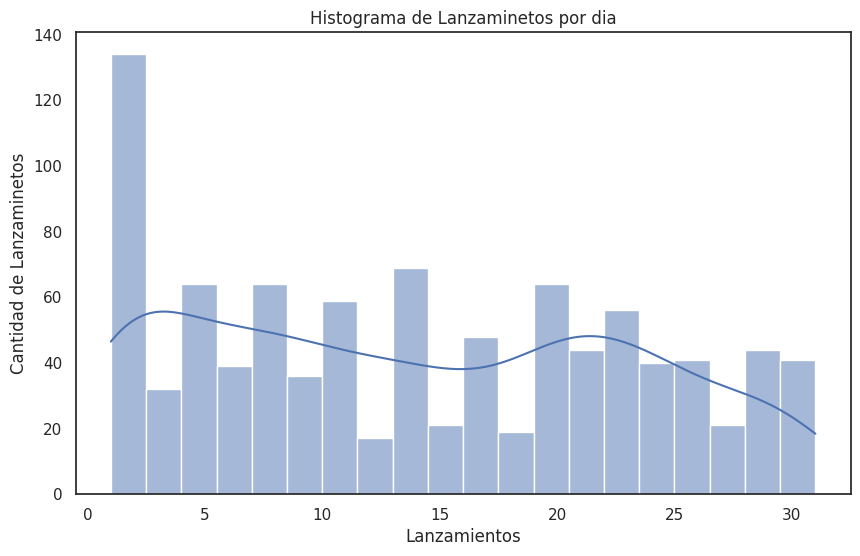

In [170]:
sns.set(style='white')

# Creando el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_spot['released_day'], kde=True, bins=20, stat='count')
# sns.histplot(df_spot['released_day'], kde=True, bins=50,stat='count')
# sns.histplot(df_spot['released_day'], kde=True, bins=20,stat='density')

# Configurando títulos y etiquetas
plt.title('Histograma de Lanzaminetos por dia')
plt.xlabel('Lanzamientos')
plt.ylabel('Cantidad de Lanzaminetos')

# Mostrando el gráfico
plt.show()

# Tema 4: Correlación y regresión lineal simple

Vamos a explorar las relaciones entre

### Matriz de correlación

In [171]:
df_numeric = df_spot.select_dtypes(include=['float64', 'int64'])

In [172]:
corr_matrix = df_numeric.corr()

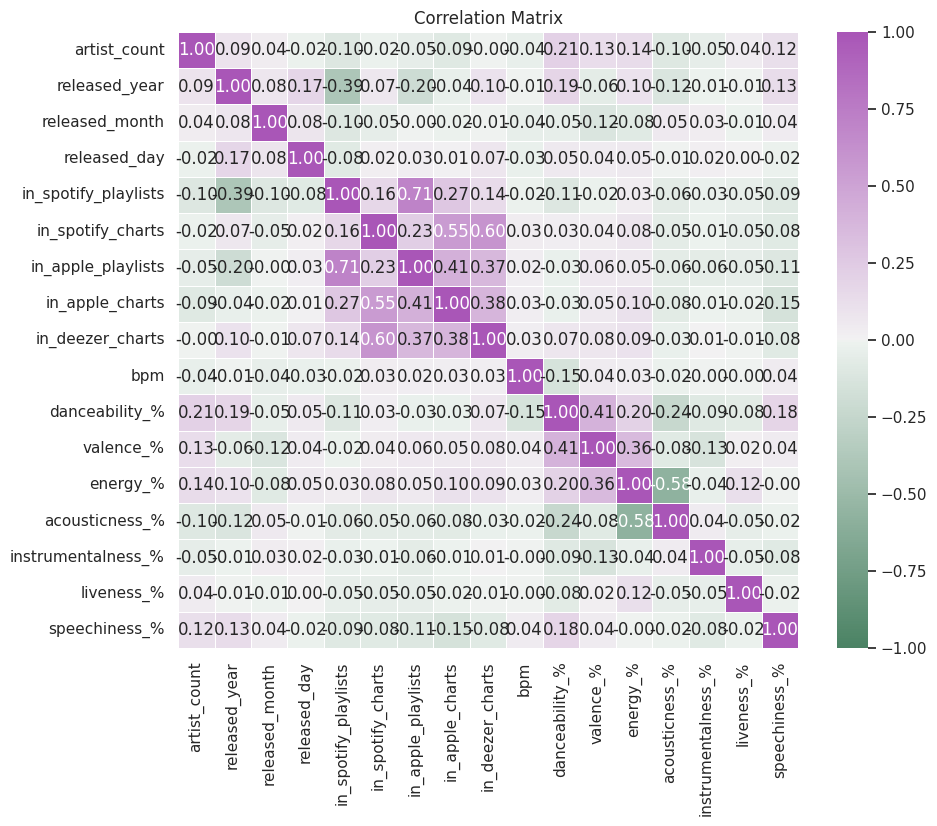

In [173]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [174]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

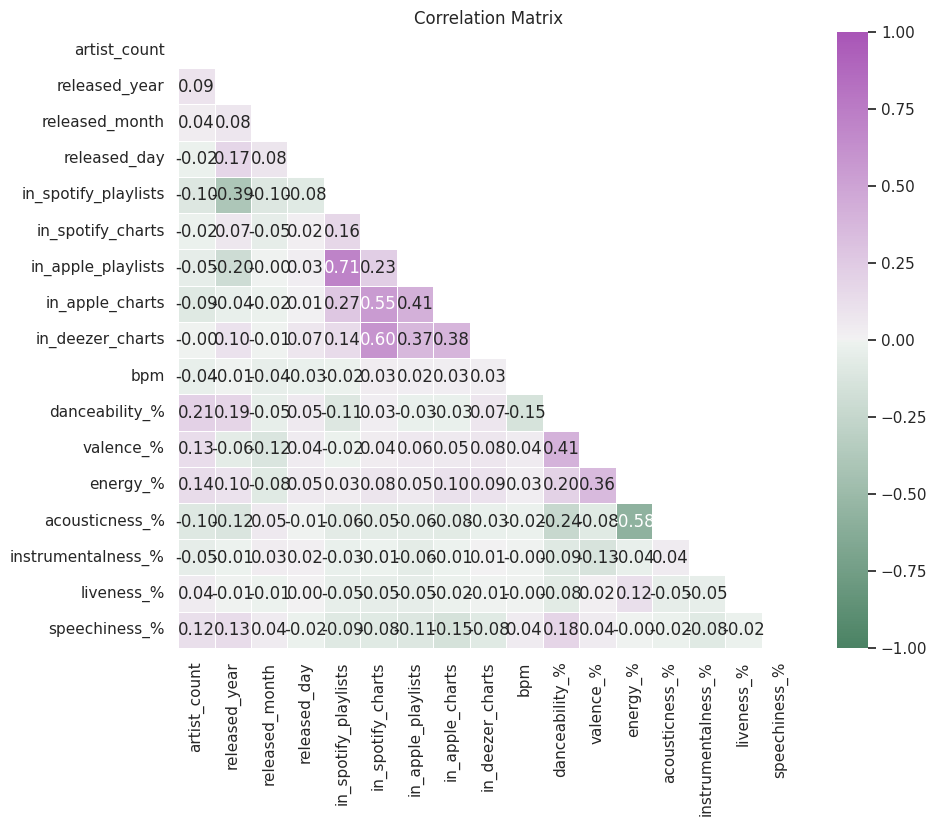

In [175]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [176]:
#sns.set(style="whitegrid", palette="pastel")
#sns.pairplot(df_numeric)

Con la matriz de correlación anterior y el pairplot, podemos observar que las variables que tienen correlaciones positivas son , las variable con mayor correlación positiva son: . Mientras que las variables con correlación negativa son:, las variables con mayor correlación negativa son:

  
  ¿Tienes algunas hipótesis acerca de por qué existen estas correlaciones (o porque no existen)?


### Gráficas de dispersión

## Regresión Lineal Simple

Modelo de regresión lineal simple entre las variables in_spotify_playlists y in_apple_playlists

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
df_spot.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [179]:
df = df_spot[['in_spotify_playlists','in_apple_playlists']]

In [180]:
df.shape

(953, 2)

In [181]:
df.isna().sum()

in_spotify_playlists    0
in_apple_playlists      0
dtype: int64

In [182]:
df = df[df > 0]

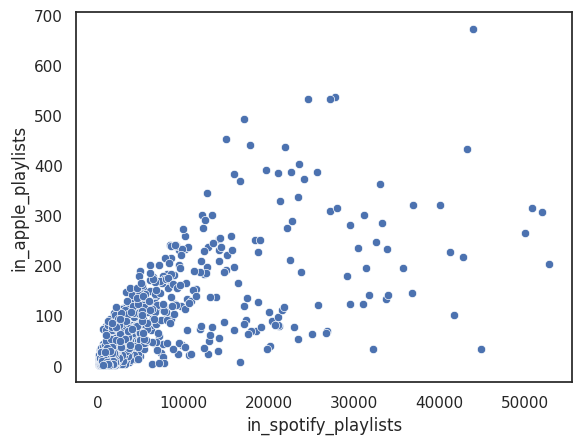

In [183]:
sns.scatterplot(x=df['in_spotify_playlists'], y= df['in_apple_playlists']);

In [184]:
df = df[df['in_spotify_playlists'] < 10000]
df = df[df['in_apple_playlists'] < 300]

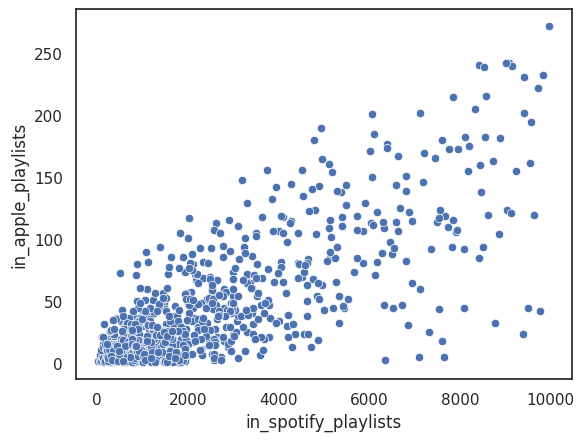

In [185]:
sns.scatterplot(x=df['in_spotify_playlists'], y=df['in_apple_playlists']);

In [186]:
df = df.dropna()

In [187]:
df['in_spotify_playlists'].corr(df['in_apple_playlists'])

0.7791366746260976

In [188]:
lr = LinearRegression()
lr

LinearRegression()

In [189]:
lr.fit(df['in_spotify_playlists'].to_frame(), df['in_apple_playlists'])

LinearRegression()

In [190]:
y_predict = lr.predict(df['in_spotify_playlists'].to_frame())

In [191]:
coefs = lr.coef_[0]

In [192]:
intercept = lr.intercept_

In [193]:
print("y = {:.4f} + {:.4f}x".format(intercept, coefs))

y = 4.9835 + 0.0164x


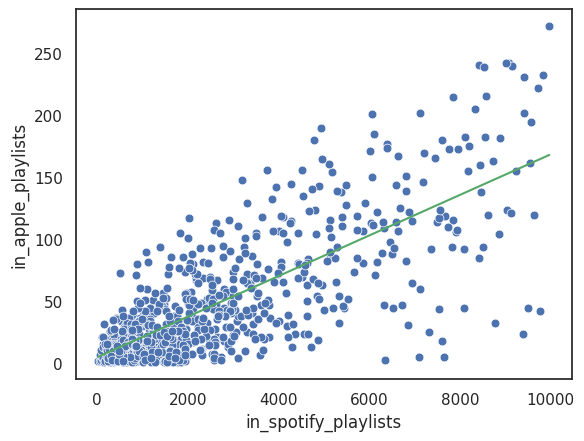

In [194]:
sns.scatterplot(x=df['in_spotify_playlists'], y=df['in_apple_playlists'], s=40);
sns.lineplot(x=df['in_spotify_playlists'], y=y_predict, color='g');

In [195]:
lr.score(df['in_spotify_playlists'].to_frame(), df['in_apple_playlists'])

0.6070539577474123

Modelo de regresión lineal simple entre las variables energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song

In [196]:
df = df_spot[['acousticness_%','energy_%']]

In [197]:
df.shape

(953, 2)

In [198]:
df.isna().sum()

acousticness_%    0
energy_%          0
dtype: int64

In [199]:
df = df[df > 0]

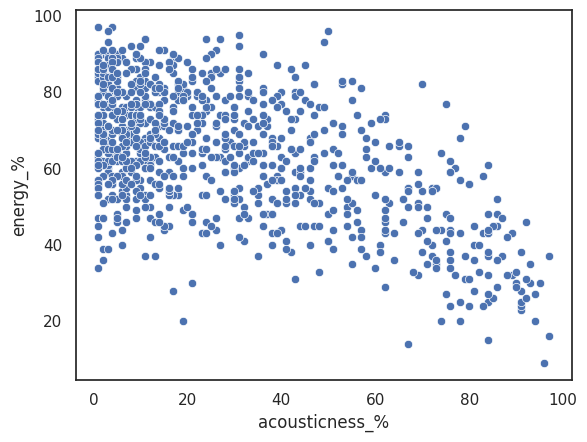

In [200]:
sns.scatterplot(x=df['acousticness_%'], y= df['energy_%']);

In [201]:
df = df.dropna()

In [202]:
df['acousticness_%'].corr(df['energy_%'])

-0.5710020175458678

# Tema 5: Distribuciones muestrales y técnicas de evaluación de modelos






### Bootstrap


In [203]:
# Filtrar las columnas numéricas
df_numeric = df_spot.select_dtypes(include=['float64', 'int64'])

# Calcular medidas de locación y dispersión
summary_stats = df_numeric.describe()

# Imprimir las medidas de locación y dispersión
print(summary_stats)

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

In [204]:
!pip install pandas numpy scikit-learn
import pandas as pd
import numpy as np
from sklearn.utils import resample



# Filter the numerical columns
df_numeric = df_spot.select_dtypes(include=['float64', 'int64'])

# Calculate summary statistics for the numerical columns
summary_stats = df_numeric.describe()

# Print the summary statistics
print(summary_stats)

# Get only the numerical columns
numeric_columns = df_numeric.columns

# Number of bootstrap samples
num_samples = 1000

# Dictionary to store the bootstrap statistics for each column
bootstrap_statistics = {}

# Loop through each numerical column
for column in numeric_columns:
    # Get the variable of interest from the DataFrame
    data = df_spot[column]

    # List to store the bootstrap statistics (in this case, the mean)
    column_bootstrap_statistics = []

    # Loop to generate the bootstrap samples and calculate the mean of each sample
    for _ in range(num_samples):
        # Generate a bootstrap sample using resampling with replacement
        bootstrap_sample = resample(data)

        # Calculate the statistic of interest (in this case, the mean) and add it to the list
        bootstrap_mean = np.mean(bootstrap_sample)
        column_bootstrap_statistics.append(bootstrap_mean)

    # Store the bootstrap statistics in the dictionary
    bootstrap_statistics[column] = {
        'mean': np.mean(column_bootstrap_statistics),
        'std': np.std(column_bootstrap_statistics),
        'skewness': pd.Series(column_bootstrap_statistics).skew(),
        'kurtosis': pd.Series(column_bootstrap_statistics).kurtosis()
    }

# Print the results
for column, stats in bootstrap_statistics.items():
    print(f"\nEstadísticas Bootstrap para '{column}':")
    print("Media Bootstrap:", stats['mean'])
    print("Desviación Estándar Bootstrap:", stats['std'])
    print("Asimetría Bootstrap:", stats['skewness'])
    print("Curtosis Bootstrap:", stats['kurtosis'])

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

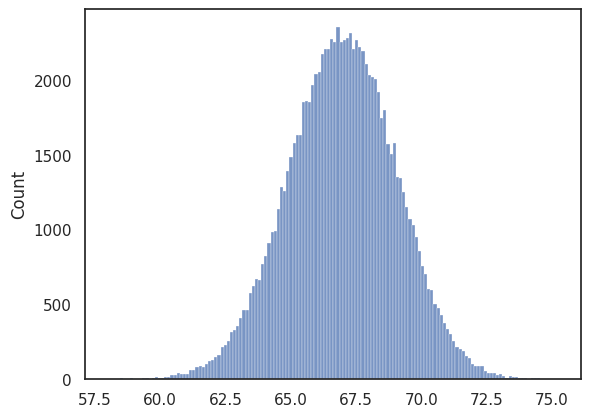

Skewness: -0.059630520722029366
Kurtosis: -0.01595451165689621


In [205]:
# Bootstrap
danceability = df_spot['danceability_%']
means = []

for i in range(100_000):
    sample = danceability.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

# Crea un histograma de la serie de medias
sns.histplot(serie_means, kde=False)

# Muestra el gráfico
plt.show()

# Teorema del límite central
print("Skewness:", serie_means.skew())
print("Kurtosis:", serie_means.kurtosis())

Error estándar: 2.0686427302374892
Valor mínimo: 58.14
Valor máximo: 75.4
Rango: 17.260000000000005
62.86
70.96
Intervalo de 95% confianza de la media: 62.86 < 66.96956977964324 < 70.96
Intervalo de 95% confianza de la media: 66.96956977964324 +/- 4.049999999999997


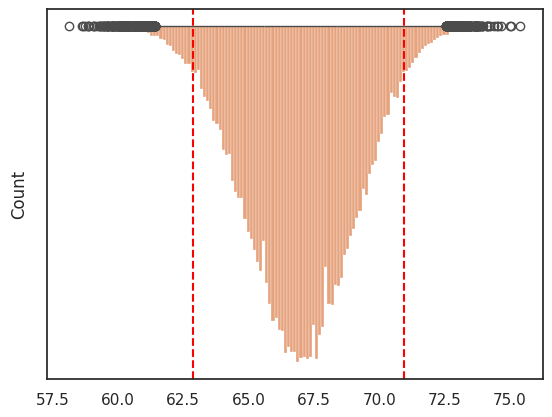

In [206]:
# Error estándar
means = []

for i in range(100_000):
    sample = danceability.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

print(f'Error estándar: {serie_means.std()}')

print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

sns.boxplot(serie_means, orient='h')

# Intervalos de confianza
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
print(limite_inferior)
print(limite_superior)

print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {danceability.mean()} < {limite_superior}')

mean_of_intervals = ((danceability.mean() - limite_inferior) + (limite_superior - danceability.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {danceability.mean()} +/- {mean_of_intervals}')

# Creando el histograma con sns.histplot
sns.histplot(serie_means, kde=False)

# Añadiendo las líneas verticales para los límites
plt.axvline(x=limite_inferior, color='red', linestyle='--')
plt.axvline(x=limite_superior, color='red', linestyle='--')

# Mostrando el gráfico
plt.show()


### Regresión lineal multiple

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleccionar las columnas danceability_%, valence_% y energy_%
X = df_spot[['valence_%', 'energy_%']]
y = df_spot['danceability_%']
print(X)
print(y)



     valence_%  energy_%
0           89        83
1           61        74
2           32        53
3           58        72
4           23        80
..         ...       ...
948         24        39
949          7        24
950         81        67
951         67        77
952         32        67

[953 rows x 2 columns]
0      80
1      71
2      51
3      55
4      65
       ..
948    60
949    42
950    80
951    82
952    61
Name: danceability_%, Length: 953, dtype: int64


In [208]:

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


In [209]:
# Entrenar el modelo de regresión lineal con el conjunto de entrenamiento
lr = LinearRegression()
lr.fit(X_training, y_training)


LinearRegression()

In [210]:

# Calcular el puntaje R2 del modelo con el conjunto de prueba
lr.score(X_test, y_test)



0.17005835994291252

In [211]:
# Entrenar un nuevo modelo de regresión lineal con todos los datos
lr_2 = LinearRegression()
lr_2.fit(X, y)


LinearRegression()

In [212]:
# Calcular el puntaje R2 del modelo entrenado con todos los datos
lr_2.score(X, y)

0.1699363975462732

#Tema 6: Análisis de datos avanzada
En esta sección usaremos Graficas de Barras, Scatterplots (por categoría y con variables condicionales), ya que estos son ideales para relacionar y analizar datos de nuestro dataset “Spotify_2023”  🎵 📊
---



## Graficas de Barras 📊

Los Top 3 artistas con las canciones más esuchadas en el 2023 con un tipico grafico de barras con diferentes colores.

<ipython-input-213-ae382b28bc66>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




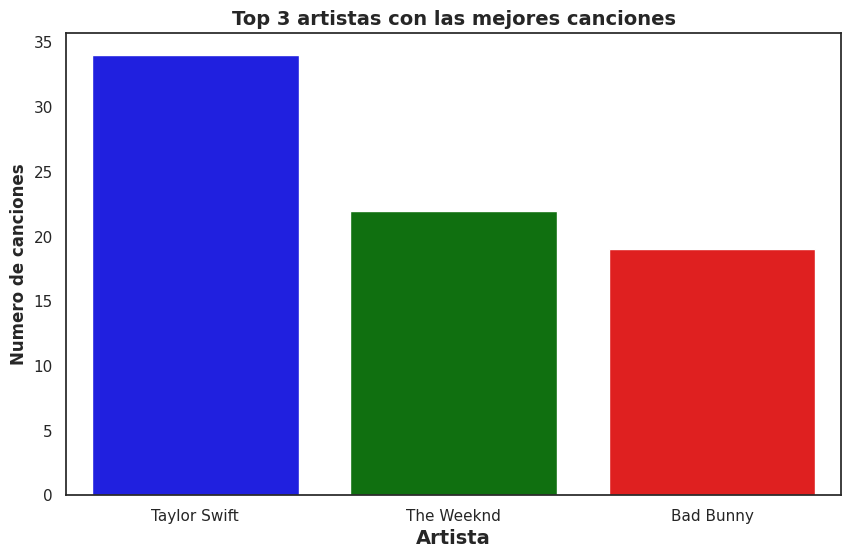

In [213]:
top_artistas = df_spot['artist(s)_name']. value_counts().head(3)
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10,6))
sns.barplot(x=top_artistas.index, y=top_artistas, palette=colors)
plt.ylabel('Numero de canciones', fontsize =12, fontweight = 'bold')
plt.xlabel('Artista',fontsize = 14, fontweight= 'bold')
plt.title('Top 3 artistas con las mejores canciones', fontsize = 14, fontweight = 'bold')
plt.show()

In [214]:
df_spot['streams'] = pd.to_numeric(df_spot['streams'], errors='coerce')
df_spot['in_deezer_playlists'] = pd.to_numeric(df_spot['in_deezer_playlists'], errors='coerce')
df_spot['in_shazam_charts'] = pd.to_numeric(df_spot['in_shazam_charts'], errors='coerce')

# Lets check again
df_spot.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

Lista de las canciones más populares del 2023 con Plotly Express para tener una visualización interactiva 🔍

In [215]:
sort_by_streams = df_spot.sort_values(by="streams", ascending=False)
top = sort_by_streams.head(20)
fig1 = px.bar(top, x='track_name', y='streams',
              title='Canciones más populares 2023',
              color='track_name',
              color_continuous_scale = 'viridis',
             hover_name = 'artist(s)_name')

fig1.update_xaxes(categoryorder='total descending')
fig1.update_xaxes(title_text='Canción')
fig1.update_yaxes(title_text='Total Reproducciones')
fig1.update_layout(width=1000, height=800)
plt.tight_layout()
fig1.show()

<Figure size 640x480 with 0 Axes>

##Scatterplots
Las gráficas de dispersión muestran la relación entre dos variables numéricas mediante puntos en un plano cartesiano, estas son muy utiles para detectar patrones y tendencias de los datos.

###Por categorías
Muestra la distribución de los puntos entre diferentes grupos categóricos, por lo que cada categoría se representa con un conjunto de puntos.

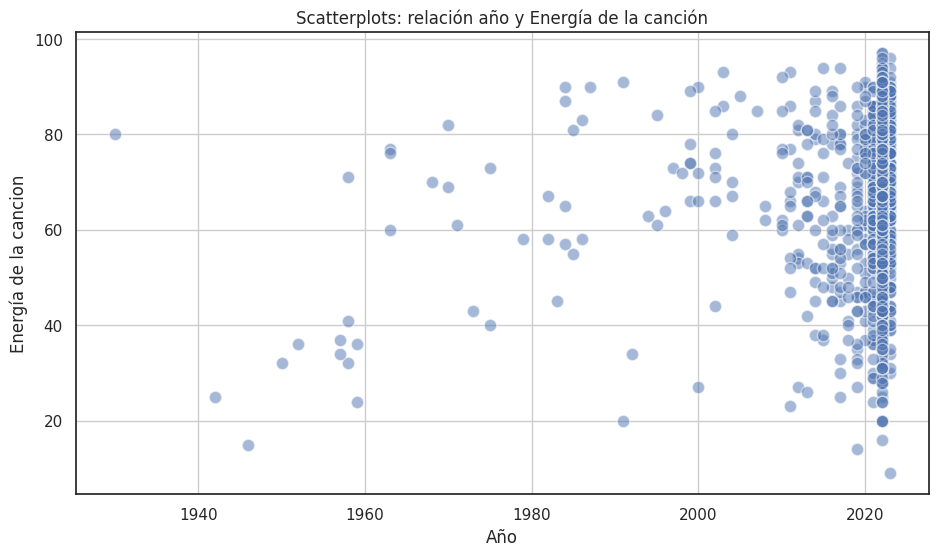

In [216]:
plt.figure(figsize=(11,6))
plt.scatter(df_spot['released_year'], df_spot['energy_%'], alpha=0.5,edgecolors ='w', s= 80)
plt.title('Scatterplots: relación año y Energía de la canción')
plt.xlabel('Año')
plt.ylabel('Energía de la cancion')
plt.grid(True)
plt.show()

###Variables Condicionantes
Muestra puntos en un gráfico donde la posición de cada punto está determinada por dos variables numéricas, estás influenciadas por una tercera variable categórica. Esto nos permite ver cómo la relación entre las dos variables numéricas varía según las diferentes categorías de la tercera variable.





In [217]:
df_grouped = df_spot.groupby('artist(s)_name')[['energy_%', 'released_year', 'mode']].max()

In [218]:
filtro_ = df_grouped['mode'].isin(['Minor', 'Major',])
df_artista = df_grouped[filtro_]

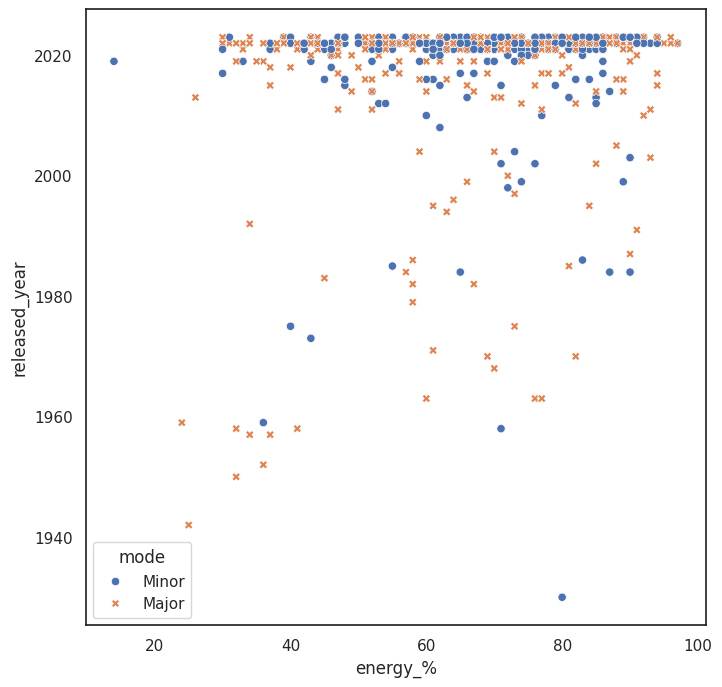

In [219]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)  # 111 significa 1 fila, 1 columna, índice 1

sns.scatterplot(data=df_artista, x='energy_%', y='released_year', hue='mode', style='mode', ax=ax)

plt.show()

In [220]:
Minor = df_artista[df_artista['mode'] == 'Minor']
Major = df_artista[df_artista['mode'] == 'Major']

In [221]:
df_artista.head()

,energy_%,released_year,mode
artist(s)_name,,,
(G)I-DLE,91,2023,Minor
"21 Savage, Gunna",73,2022,Major
"24kgoldn, Iann Dior",72,2020,Minor
50 Cent,71,2002,Minor
"A$AP Rocky, Metro Boomin, Roisee",53,2023,Minor


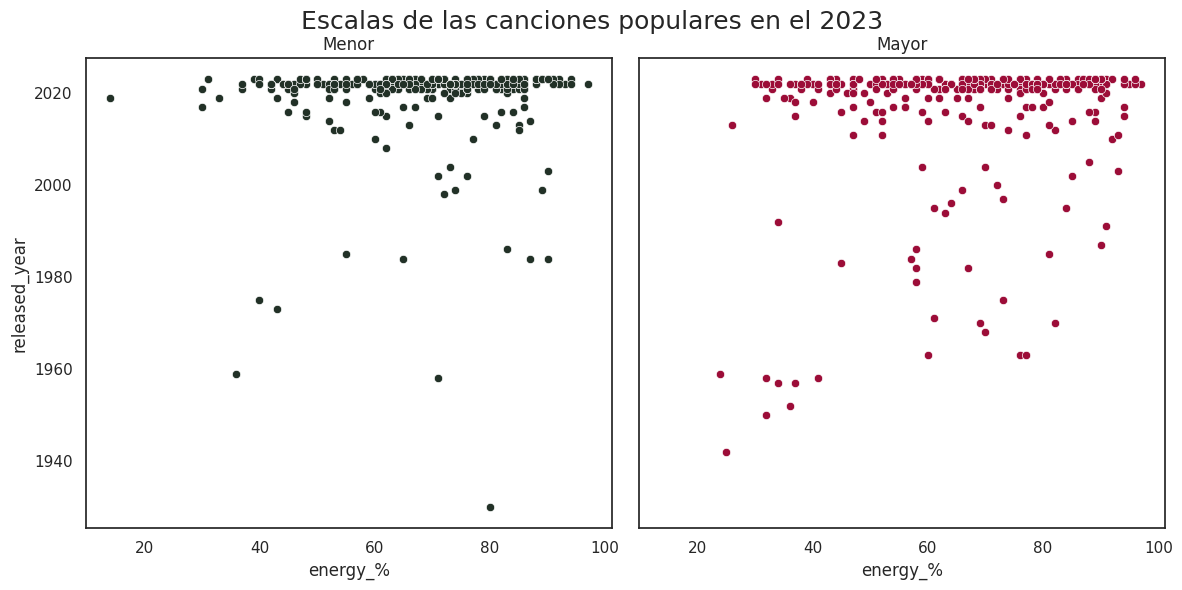

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
palette = ["#223127","#9c0d38"]
sns.scatterplot(data=Minor, x='energy_%', y='released_year', ax=axes[0],color=palette[0])
sns.scatterplot(data=Major, x='energy_%', y='released_year', ax=axes[1], color=palette[1])

axes[0].set_title('Menor')
axes[1].set_title('Mayor')

fig.suptitle('Escalas de las canciones populares en el 2023', fontsize=18, x=0.5)
plt.tight_layout()

plt.subplots_adjust(top=0.9)

In [223]:
df_bi = df_spot.groupby('artist(s)_name')[['bpm', 'streams']].max()

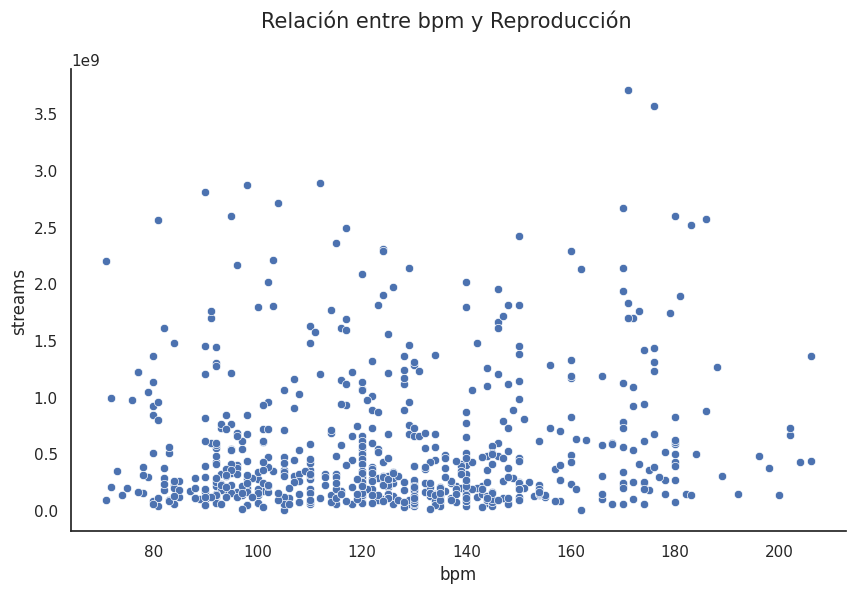

In [224]:
sns.set_style('white')

# Crear una figura y añadir un subplot a ella
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df_bi, x='bpm', y='streams', ax=ax)
sns.set_palette(palette='rocket')
# Establecer un título para la figura
fig.suptitle('Relación entre bpm y Reproducción', fontsize=15)

# Ocultar los spines superior y derecho, Linea que delimita el Área de la Gráfica.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

##Tema 7. Pruebas A/B y Procesamiento de Lenguaje Natural

In [225]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [227]:
!pip install nltk

In [228]:
df_N = df_spot.dropna(subset=['key'])
df_N.dropna(subset=['key'], inplace=True)
df_N.to_csv('df_spot', index=False)

<ipython-input-228-1ccea5f16d99>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
grouped_a = df_N.groupby('streams')['key'].max()
grouped_a = grouped_a.str.lower()
grouped_a = grouped_a.str.strip()
grouped_a = grouped_a.str.replace('[^\w\s]', '')
grouped_a = grouped_a.str.replace('\d', '')
grouped_a = grouped_a.str.replace('\\n', '')
grouped_a = grouped_a.dropna()

tokenized = grouped_a.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

<ipython-input-229-5c875d3eca0d>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-229-5c875d3eca0d>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-229-5c875d3eca0d>:6: FutureWarning:

The default value of regex will change from True to False in a future version.



In [230]:
tokenized = grouped_a.apply(nltk.word_tokenize)
all_words = tokenized.sum()

<ipython-input-231-fc5ce30a43b4>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




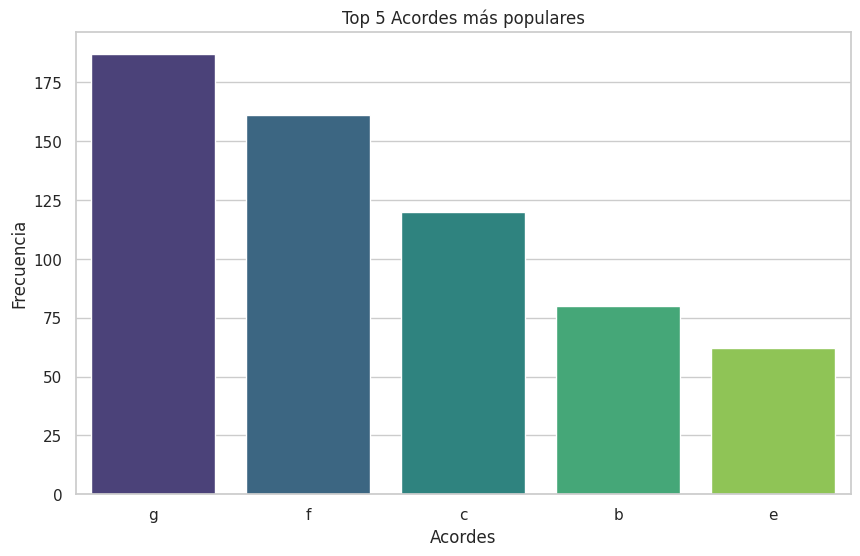

In [231]:
most = np.array(list(map(lambda x: list(x), freq_dist.most_common(5))))

labels = most[:, 0]
heights = most[:, 1].astype(int)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=heights, palette="viridis")

plt.xlabel("Acordes")
plt.ylabel("Frecuencia")
plt.title("Top 5 Acordes más populares")


# Mostrar el gráfico
plt.show()